## FRAUD DETECTION EXERCISE

[The Dataset](https://www.kaggle.com/mlg-ulb/creditcardfraud) contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation.

***
## Table of contents
1. [Train / test split](#1.-Train-/-test-split)
2. [Random Forest vs SVC algorithms](#2.-Random-Forest-vs-SVC)
3. [Cut-off level](#3.-Cut-off-level)
4. [Checking validation set](#4.-Checking-validation-set)
5. [Oversampling and Undersampling](#5.-Oversampling-and-Undersampling)

##    
***

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler

In [2]:
df = pd.read_csv("creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
df.shape

(284807, 31)

##### <div style="text-align: right"> [back to 'Table of contents'](##Table-of-contents) </div>
***
### 1. Train / test split
#### Spliting dataset to training, testing and validation

In [4]:
x = df.drop("Class", axis=1)
y = np.array(df[["Class"]])

In [5]:
x_train, x_temp, y_train, y_temp = train_test_split(x,y,test_size=0.4,random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_temp,y_temp,test_size=0.5,random_state=42)

##### <div style="text-align: right"> [back to 'Table of contents'](##Table-of-contents) </div>
***
### 2. Random Forest vs SVC
#### Training and checking performance of Random Forest ans SVC alorithms

- __Random Forest__

In [6]:
rfc = RandomForestClassifier(max_depth=10, n_estimators=10)
rfc.fit(x_train, y_train.ravel())
rf_y_pred = rfc.predict(x_test)

In [7]:
print(classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.96      0.76      0.85        98

    accuracy                           1.00     56961
   macro avg       0.98      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961



In [8]:
rfc_y_pred = rfc.predict(x_test)
confusion_matrix(y_test, rfc_y_pred)

array([[56860,     3],
       [   24,    74]], dtype=int64)

- __SVC__

In [9]:
svm = SVC().fit(x_train, y_train.ravel())
svm_y_pred = svm.predict(x_test)

In [10]:
print(classification_report(y_test, svm_y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961



In [11]:
confusion_matrix(y_test, svm_y_pred)

array([[56863,     0],
       [   98,     0]], dtype=int64)

_SVC haven't recognised any 'True Negative' occurrences - in this case F1-score is not reliable_  
_SVC seems that can't cope with this complex dataset_

##### <div style="text-align: right"> [back to 'Table of contents'](##Table-of-contents) </div>
***
### 3. Cut-off level
#### Chosing optimal threshold of cut-off level for fraud detection. Considering if it's worse to label:
- __legal__ transaction as __fraud__ or 
- __ilegal__ transaction as __not fraud__

In [12]:
thresholds = np.arange(0,1.05,.05)
TP, FP, TN, FN, prec, rec, acc = [], [], [], [], [], [], []
for threshold in thresholds:
    predicted = rfc.predict_proba(x_test)
    predicted[:,0] = (predicted[:,0] < threshold).astype('int')
    predicted[:,1] = (predicted[:,1] >= threshold).astype('int')
    cm = confusion_matrix(y_test, predicted[:,1])
    tp, fp, fn, tn = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    TP.append(tp)
    FP.append(fp)
    FN.append(fn)
    TN.append(tn)

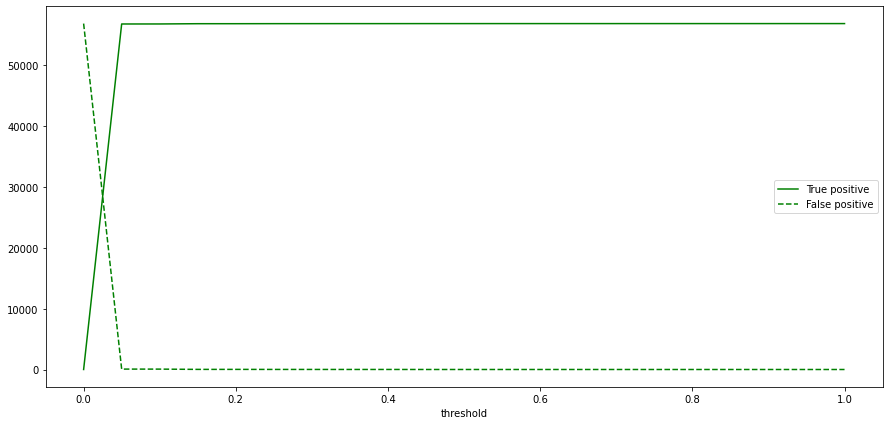

In [13]:
plt.figure(figsize=(15,7))
plt.plot(thresholds,TP, "g")
plt.plot(thresholds,FP, "g--")
plt.xlabel("threshold")
plt.legend(["True positive","False positive"]);

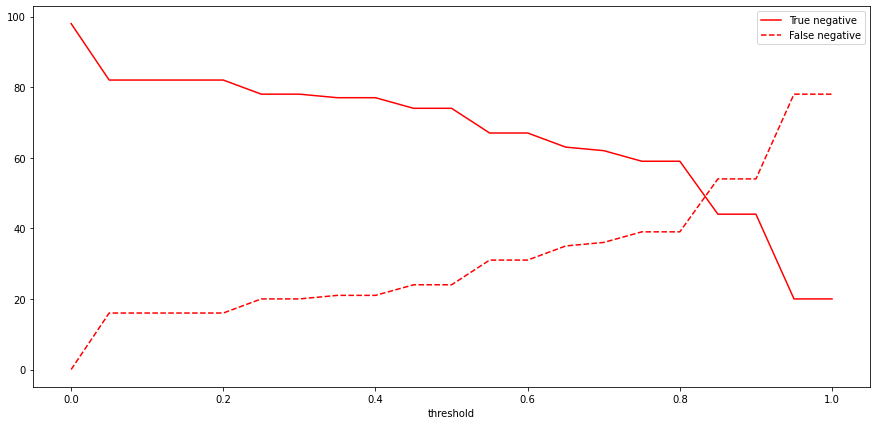

In [14]:
plt.figure(figsize=(15,7))
plt.plot(thresholds,TN, "r")
plt.plot(thresholds,FN, "r--")
plt.xlabel("threshold")
plt.legend(["True negative","False negative"]);

_**Conclusions:**_  
- _threshold should be over 0.05 - detecting most of frauds_  
- _next step is depends on bussiness politics:_  
    - _threshold less than 0.82 - allows to lower the probability of labeling as 'fraud' hones clients_  
    - _threshold over than 0.82 - will detect more frauds, but they can be labeled incorectly_

##### <div style="text-align: right"> [back to 'Table of contents'](##Table-of-contents) </div>
***
### 4. Checking validation set

In [15]:
np.random.seed(0)
x_val = x_val.drop(np.random.choice(x_val.index,1))
y_val = np.delete(y_val,(np.random.choice(x_val.index,1)))

_removing random row to equalize number of records in test an validation dataset (difference of 1 row)_

In [16]:
rf_y_pred2 = rfc.predict(x_val)

- RandomForest  -   test score:

In [17]:
print(classification_report(y_test, rf_y_pred))
print(confusion_matrix(y_test, rf_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.96      0.76      0.85        98

    accuracy                           1.00     56961
   macro avg       0.98      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

[[56860     3]
 [   24    74]]


- RandomForest  -   validation score:

In [18]:
print(classification_report(y_val, rf_y_pred2))
print(confusion_matrix(y_val, rf_y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.85      0.76      0.80        93

    accuracy                           1.00     56961
   macro avg       0.92      0.88      0.90     56961
weighted avg       1.00      1.00      1.00     56961

[[56855    13]
 [   22    71]]


##### <div style="text-align: right"> [back to 'Table of contents'](##Table-of-contents) </div>
***
### 5. Undersampling 
#### Due the fraud occurrence is very rare (0.172% of dataset), Undersampling method improve improve detection 

In [19]:
rus = RandomUnderSampler(sampling_strategy='majority',  random_state=42)
x_under, y_under = rus.fit_resample(x_train, y_train)
y_under_pred = rfc.predict(x_under)
print(classification_report(y_under, y_under_pred))
confusion_matrix(y_under, y_under_pred)

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       301
           1       1.00      0.83      0.91       301

    accuracy                           0.92       602
   macro avg       0.93      0.92      0.92       602
weighted avg       0.93      0.92      0.92       602



array([[301,   0],
       [ 50, 251]], dtype=int64)

_Undersampling balanced confusion matrix between True Positive and True Negative.   
Also it is noticable that algorithim haven't recognised any False Positive - that means none of honest clients were classified as 'fraud'_